In [1]:
import pandas as pd

from scipy.stats import ttest_ind, norm
from matplotlib import pyplot as plt

In [2]:
rvs1 =  norm.rvs(loc=5,scale=10,size=500)
rvs1

array([ 3.11957469e+00,  1.59473693e+01,  3.48132707e+00, -2.60824645e+00,
       -3.85194430e+00,  2.69778639e+00, -3.21138803e+00,  5.38471979e+00,
       -1.20029589e+01,  2.00520516e+01, -1.26729553e+01, -2.93905726e+01,
        8.78039754e+00,  1.51229991e+01,  1.79352259e+01,  9.42349708e+00,
        9.43133326e+00,  9.68246862e+00,  2.03441399e+00,  4.53312862e+00,
       -7.54540975e+00,  2.37135817e+01,  2.19423648e+00,  7.27679648e+00,
        1.67032521e+01, -5.26844927e+00, -7.26949232e+00,  1.26490877e+01,
        3.56011593e+00,  7.00616425e+00,  1.00341224e+01, -9.89142551e+00,
        4.97969340e-01,  3.82931707e+00, -4.99723307e+00,  2.72316416e+01,
        9.19512642e-01,  1.37029542e+01,  3.62980569e+00, -3.30775112e+00,
        1.17402201e+01,  2.21911535e+00,  1.21392198e+01,  3.95068032e+00,
        6.37626944e+00, -2.21325451e+00,  1.48288729e-01,  1.93568300e+01,
        1.04548445e+01,  1.17001270e+01, -1.35526307e+01,  1.45782601e+01,
        8.93939551e+00,  

In [3]:
rvs2 =  norm.rvs(loc=5,scale=10,size=1000)

(array([  6.,  33.,  84., 172., 262., 248., 130.,  53.,   6.,   6.]),
 array([-26.38502279, -19.82319829, -13.26137379,  -6.69954929,
         -0.13772479,   6.42409971,  12.98592421,  19.54774871,
         26.10957321,  32.67139771,  39.23322221]),
 <BarContainer object of 10 artists>)

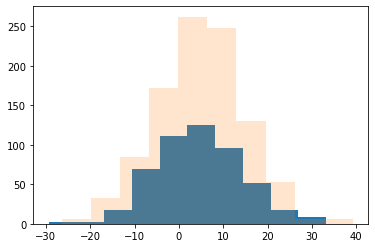

In [4]:
plt.hist(rvs1)
plt.hist(rvs2, alpha=0.2)

In [8]:
ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=0.4440743344875711, pvalue=0.6570529813507314)

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/Part1_Crime_2017_to_2018.csv')

In [7]:
df.shape

(100677, 19)

In [9]:
df.dtypes

objectid             int64
rowid_               int64
crimedatetime       object
crimetime           object
crimecode           object
location            object
description         object
inside_outside      object
weapon              object
post               float64
district            object
neighborhood        object
latitude           float64
longitude          float64
geolocation         object
premise             object
vriname             object
total_incidents      int64
hashedrecord        object
dtype: object

In [10]:
df['crimedatetime'] = pd.to_datetime(df['crimedatetime'])

In [11]:
df.head(3).T

,0,1,2
objectid,1,2,3
rowid_,82567,82568,82569
crimedatetime,2018-12-31 04:36:00,2018-12-31 17:30:00,2018-12-31 11:10:00
crimetime,4:36:00,17:30:00,11:10:00
crimecode,6G,6D,4E
location,400 W LEXINGTON ST,400 E 25TH ST,4200 FAIRFAX RD
description,LARCENY,LARCENY FROM AUTO,COMMON ASSAULT
inside_outside,I,O,I
weapon,NaN,NaN,NaN
post,114.0,513.0,624.0


Hypothesis: There is no significant difference between crimes inside and outsides

In [12]:
df['inside_outside'].value_counts()

O          40115
I          38355
Outside     1854
Inside       176
Name: inside_outside, dtype: int64

In [13]:
df['inside_outside'] = df['inside_outside'].replace({
    'O': 'Outside', 
    'I':'Inside'
})

In [14]:
df['inside_outside'].value_counts()

Outside    41969
Inside     38531
Name: inside_outside, dtype: int64

In [15]:
df['inside'] =  [1 if i=='Inside' else 0 for i in df['inside_outside']]
df['outside'] = [1 if i=='Outside' else 0 for i in df['inside_outside']]

In [16]:
df.head()

,objectid,rowid_,crimedatetime,crimetime,crimecode,location,description,inside_outside,weapon,post,...,neighborhood,latitude,longitude,geolocation,premise,vriname,total_incidents,hashedrecord,inside,outside
0,1,82567,2018-12-31 04:36:00,4:36:00,6G,400 W LEXINGTON ST,LARCENY,Inside,NaN,114.0,...,DOWNTOWN,39.2916,-76.6211,"(39.2916,-76.6211)",SPECIALTY STORE,NaN,1,0xC961940C8A250EDAFFBB5E3D0E48727AC79817AE9EA6...,1,0
1,2,82568,2018-12-31 17:30:00,17:30:00,6D,400 E 25TH ST,LARCENY FROM AUTO,Outside,NaN,513.0,...,HARWOOD,39.3181,-76.6110,"(39.3181,-76.611)",STREET,NaN,1,0x46FADA38EAC4E24AA9CCD81259651137A8073440F5F2...,0,1
2,3,82569,2018-12-31 11:10:00,11:10:00,4E,4200 FAIRFAX RD,COMMON ASSAULT,Inside,NaN,624.0,...,WEST FOREST PARK,39.3204,-76.6877,"(39.3204,-76.6877)",APT/CONDO - OCCUPIED,NaN,1,0xFE7A5EDB382D00C6265CB48762D75AB7D2BC374871E8...,1,0
3,4,82570,2018-12-31 19:45:00,19:45:00,4E,6500 SAINT HELENA AVE,COMMON ASSAULT,Inside,NaN,234.0,...,SAINT HELENA,39.2600,-76.5311,"(39.26,-76.5311)",ROW/TOWNHOUSE-OCC,NaN,1,0xD60C2FB5283D72C29328A7DF528251D4B0F3EF0D9474...,1,0
4,5,82571,2018-12-31 22:43:00,22:43:00,4A,2400 W BELVEDERE AVE,AGG. ASSAULT,Inside,FIREARM,532.0,...,LEVINDALE,39.3545,-76.6623,"(39.3545,-76.6623)",HOSP/NURS. HOME,NaN,1,0x3D27E5CF73522B733BA7EA512013FE1D8BE621801CC8...,1,0


In [17]:
df_io = df[['inside', 'outside']].groupby(df['crimedatetime'].dt.date).sum() # this may be count if you are counting
df_io

,inside,outside
crimedatetime,,
2017-01-01,66,62
2017-01-02,51,67
2017-01-03,40,38
2017-01-04,19,15
2017-01-05,17,21
...,...,...
2018-12-27,44,57
2018-12-28,57,65
2018-12-29,47,62


In [18]:
inside = df_io['inside']
outside = df_io['outside']  
ttest_ind(inside, outside , equal_var=False)

Ttest_indResult(statistic=-6.703280799283819, pvalue=2.9271019609461777e-11)

pvalue is less than 0.05

Let's do another example.

Null hypothesis: There is no significant difference between Hampden & Canton neighborhood in terms of weapon used crimes.

In [19]:
df['weapon'].value_counts()

FIREARM    11006
OTHER       6477
KNIFE       3346
HANDS       1336
FIRE         391
Name: weapon, dtype: int64

In [20]:
df_weapon = df[df['weapon'].isna() == False]

In [21]:
hampden = df_weapon[ df_weapon['neighborhood'] == 'HAMPDEN' ]
canton = df_weapon[ df_weapon['neighborhood'] == 'CANTON' ]

In [22]:
hampden_counts = hampden['weapon'].groupby( hampden['crimedatetime'].dt.date ).count()
hampden_counts

crimedatetime
2017-01-01    3
2017-01-05    1
2017-01-08    3
2017-01-24    1
2017-01-25    1
             ..
2018-12-12    1
2018-12-15    1
2018-12-16    1
2018-12-18    4
2018-12-30    1
Name: weapon, Length: 106, dtype: int64

In [23]:
canton_counts = canton['weapon'].groupby( canton['crimedatetime'].dt.date ).count()
canton_counts

crimedatetime
2017-01-01    4
2017-01-02    2
2017-01-07    2
2017-01-12    1
2017-01-13    1
             ..
2018-12-18    1
2018-12-26    1
2018-12-29    1
2018-12-30    2
2018-12-31    1
Name: weapon, Length: 133, dtype: int64

In [24]:
ttest_ind(hampden_counts, canton_counts, equal_var=False)

Ttest_indResult(statistic=0.1379880975095151, pvalue=0.8904029753837779)

In [25]:
from random import randint

In [26]:
df = pd.DataFrame()
df['a'] = norm.rvs(loc=5,scale=10,size=500) #  [x for x in range(20)]
df['b'] = norm.rvs(loc=5,scale=10,size=500)

df

,a,b
0,-9.246114,10.720867
1,-6.220923,0.630518
2,7.596868,2.832169
3,14.610219,-2.324817
4,16.906188,-2.036445
...,...,...
495,-9.889488,1.971024
496,7.311259,17.185562
497,19.608703,2.732120
498,-2.110124,9.139903


In [27]:
df[['a','b']].corr()

,a,b
a,1.000000,0.078135
b,0.078135,1.000000


In [32]:
df = pd.DataFrame()
df['a'] =  [x for x in range(20)]
df['b'] = [-(x + randint(-3, 3)) for x in range(20)]
df

,a,b
0,0,1
1,1,-2
2,2,-2
3,3,-1
4,4,-1
5,5,-2
6,6,-8
7,7,-6
8,8,-7
9,9,-8


In [33]:
df.corr()

,a,b
a,1.000000,-0.967669
b,-0.967669,1.000000
